# PROJET PYTHON POUR LA DATA SCIENCE 2022

# THEME : ANALYSE DES AVIS DES STAGIAIRES ET EMPLOYES DE SOCIETE GENERALE TRANSMIS VIA LA PLATEFORME INDEED.COM ENTRE 2012 ET 2022  

## Auteurs:
* TALEB AHMED Raja
* MAGAJIE WAMSA Berthe Magella
* RENE Léo

## ANALYSE DE DONNEES ET NATURAL LANGUAGE PROCESSING (NLP)

### INTRODUCTION

  ### Contexte et Justification du projet

  Société Générale est l'un des tout premiers groupes européens de services financiers et acteur important de l’économie depuis plus de 150 ans. Au quotidien, 25 millions de clients sont accompagnés grâce à ses plus de 117 000 collaborateurs répartis dans 66 pays. Le groupe Société Générale se positionne en partenaire de confiance pour ses clients, engagé dans le développement durable de l’Afrique, ou bien encore pour l'accompagnement de la transition écologique mondiale. Quatre principales valeurs y sont partagées selon le site officiel du groupe : Esprit d’équipe, Innovation, Responsabilité, Engagement (https://www.societegenerale.com/fr/le-groupe-societe-generale/identite/presentation).  
  
  L’ENSAE Paris a noué des partenariats structurants avec des entreprises visant à améliorer leur visibilité auprès des élèves et à favoriser l’émergence des projets communs. Société Générale fait partie de ces partenaires prestigeux. Avec plus de 600 métiers dans le monde, l’entreprise recrute en effet des talents dans de nombreux secteurs : risques, IT, data, consulting interne, etc. Pour les étudiants ou jeunes diplômés curieux et motivés par les défis d’une grande banque, il s'agirait du cadre adéquat; aussi, sa promesse est d'offrir à tout employé un environnement dans lequel il s'épanouie en développant son potentiel (https://www.ensae.fr/entreprises/devenir-partenaire-de-lensae-paris/nos-partenaires).
  
  Indeed est une plateforme de recherche d'emplois qui permet aux employeurs de publier des offres et aux personnes en quête d'emplois de postuler; aussi des avis sur les entreprises y sont transmis, faisant office de retour d'expérience. Ces avis, s'ils sont bien exploités, peuvent être utiles non seulement aux chercheurs d'emplois dans leur quête, mais aussi aux entreprises pour l'amélioration du quotidien de leurs employés. 

  ### Objectifs
  
L'objectif général de ce projet est d'évaluer la Société Générale au travers des retours d'expériences et avis de ceux qui y ont travaillé et ceux qui y travaillent encore. Plus spécifiquement, il s'agit de:
   * Décrire les avis transmis sur Indeed selon plusieurs critères;
   * Présenter un niveau d'appréciation global;
   * Ressortir les préoccupations les plus fréquentes;
   * Analyser les potentiels facteurs qui influencent le niveau d'appréciation des employés et stagiaires. 

  ### Méthodologie du projet

Afin d'atteindre les objectifs énoncés ci-dessus, nous avons utilisé les méthodes suivantes:

   - Web-Scrapping :
Pour constituer notre base de données, nous avons extrait des données structurées sur le Web de manière automatisée; autrement dit, nous avons usé du webscrapping sur le site Indeed.com.

   - NLP (Natural Language Processing):
C'est une méthode à l’intersection du Machine Learning et de la linguistique ayant pour but d'extraire de l'information et une signification d’un contenu textuel. Nous l'avons utilisée ici pour effectuer de la detection des langues dans les commentaires, les wordclouds, l'analyse sentimentale ainsi que la detection des différentes aspects les plus abordés dans les commentaires (topic modeling).

In [8]:
!pip install pandas


In [1]:
# Importation des packages utiles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

### TRAITEMENT DES DONNEES

In [2]:
# Importation de la base de données
df = pd.read_csv("Database.csv",sep=",")

In [1]:
# Description de la base de données initiale
print("Il y a", len(df), "individus dans notre base de données.")
print(df.columns)
df.sample(3)

NameError: name 'df' is not defined

In [4]:
#Création d'une copie de la base
df_new = df.copy()

In [5]:
#Remplacer True et False dans la  colonne is_employed du DataFrame par 1 et 0
df_new['is_employed'] = df_new['is_employed'].replace([True], 1)
df_new['is_employed'] = df_new['is_employed'].replace([False], 0)

In [6]:
#Vérification types des variables
print(df_new.dtypes)

Country         object
rating         float64
contract        object
is_employed      int64
job             object
city            object
date             int64
comment         object
dtype: object


In [7]:
#Nombre de modalités pour chacune des variables
df_new.nunique()

Country           3
rating            5
contract          3
is_employed       2
job            1706
city            803
date             11
comment        2518
dtype: int64

In [8]:
#Vérification valeurs manquantes
df_new.count()

Country        2520
rating         2520
contract        237
is_employed    2520
job            2520
city           2520
date           2520
comment        2520
dtype: int64

La seule variable contenant des valeurs manquantes est "contract" avec seulement 237 valeurs renseignées; Un peu moins du dizième des personnes ont précisé le contrat dans leurs commentaires.

In [9]:
#Suppression des codes postaux dans la colonne city 
characters = ")(1234567890"
df_new['city'] = df['city'].apply(lambda x: x.strip(characters))
df_new.head()

,Country,rating,contract,is_employed,job,city,date,comment
0,France,3.0,cdd,0,Conseillère clientèle,Massy,2022,"Bonne équipe, dommage que la direction soit bl..."
1,France,5.0,NaN,0,Responsable,Falaise,2022,"Équipe au top, l'esprit d'équipe fait la force..."
2,France,4.0,NaN,0,Compliance Officer,Nanterre,2022,"bonne ambiance, bonne équipe, bon relationnel,..."
3,France,5.0,NaN,0,Assistante administrative,Saint-Dié-des-Vosges,2022,"Missions variées, solidarité dans l’équipe et ..."
4,France,4.0,NaN,0,Chargée de communication,La Défense,2022,Première expérience professionnelle durant 3 a...


In [10]:
#Ajustement de la police pour éviter les problèmes liés à la sensibilité à la casse.
df_new['city'] = df_new['city'].apply(lambda x: x.lower())
df_new['comment']=df_new['comment'].apply(lambda x: x.lower())
df_new['job']=df_new['job'].apply(lambda x: x.lower())
df_new.head()

,Country,rating,contract,is_employed,job,city,date,comment
0,France,3.0,cdd,0,conseillère clientèle,massy,2022,"bonne équipe, dommage que la direction soit bl..."
1,France,5.0,NaN,0,responsable,falaise,2022,"équipe au top, l'esprit d'équipe fait la force..."
2,France,4.0,NaN,0,compliance officer,nanterre,2022,"bonne ambiance, bonne équipe, bon relationnel,..."
3,France,5.0,NaN,0,assistante administrative,saint-dié-des-vosges,2022,"missions variées, solidarité dans l’équipe et ..."
4,France,4.0,NaN,0,chargée de communication,la défense,2022,première expérience professionnelle durant 3 a...


In [11]:
# Définition d'une fonction qui permettra de nettoyer nos données textuelles
import re
def clean(texte):
    # Suppression des liens
    for item in re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+").findall(texte):
        texte=texte.replace(item, "")
    # Suppression du retour à la ligne
    texte = texte.replace("\n", " ").replace("\r", "") 
    # Suppression des caractères ",", "!", "?", "%", "(",")","/",'"', "$","£", "_", "-", "+", "*", "µ", ":","&,"§" 
    texte = re.sub(r"[,\!\?\%\(\)\/\"\$\£\+\*\µ,\:\&\§]", " ", texte) 
    # Suppression des apostrophes '
    for item in re.compile("([\’])").findall(texte):
        texte=texte.replace(item, " ")
    for item in re.compile("([\'])").findall(texte):
        texte=texte.replace(item, " ")
    # Suppression des points de suspension
    for item in re.compile("([.]{1,5})").findall(texte):
        texte=texte.replace(item, "") 
    # Suppression des adresses mail
    for item in re.findall('\S+@\S+', texte) :
        texte=texte.replace(item, "")
    # Suppression des mots contenant des chiffres
    texte = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", texte)
    # Diviser les mots attachés
    texte = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",texte) if s])
    return texte

In [12]:
df_new["clean_comment"] = df_new["comment"].apply(lambda x: clean(x))
df_new["clean_city"] = df_new["city"].apply(lambda x: clean(x))
df_new["clean_job"] = df_new["job"].apply(lambda x: clean(x))
df_new.head()

,Country,rating,contract,is_employed,job,city,date,comment,clean_comment,clean_city,clean_job
0,France,3.0,cdd,0,conseillère clientèle,massy,2022,"bonne équipe, dommage que la direction soit bl...",bonne équipe dommage que la direction soit bl...,massy,conseillère clientèle
1,France,5.0,NaN,0,responsable,falaise,2022,"équipe au top, l'esprit d'équipe fait la force...",équipe au top l esprit d équipe fait la force...,falaise,responsable
2,France,4.0,NaN,0,compliance officer,nanterre,2022,"bonne ambiance, bonne équipe, bon relationnel,...",bonne ambiance bonne équipe bon relationnel ...,nanterre,compliance officer
3,France,5.0,NaN,0,assistante administrative,saint-dié-des-vosges,2022,"missions variées, solidarité dans l’équipe et ...",missions variées solidarité dans l équipe et ...,saint-dié-des-vosges,assistante administrative
4,France,4.0,NaN,0,chargée de communication,la défense,2022,première expérience professionnelle durant 3 a...,première expérience professionnelle durant an...,la défense,chargée de communication


In [13]:
#Nettoyer les commentaires
b = "Évaluez votre entreprise pour afficher tous les avis".split()

def nettoyer_f(texte) :
  texte = texte.split()
  temp= []
  if len(texte) > 8 :
    for i in range(8):
      texte.pop()
  phrase = ' '
  for i in range(len(texte)):
    phrase = phrase + ' ' + texte[i]
  return phrase 

def nettoyer_a(texte):
  texte = texte.split()
  try : 
    texte.remove('Points')
  except : 
    pass
  try :
    texte.remove('points')
  except:
    pass
  try : 
    texte.remove('négatifs')
  except :
    pass
  try :
    texte.remove('positifs')
  except :
    pass
  phrase = ''
  for i in range(len(texte)):
    phrase = phrase + ' ' + texte[i]
  return phrase 

p = '''Première expérience professionnelle durant 3 ans. J'ai été ravie de grandir chez BBDF avec un environnement de travail très favorable bien que le rythme ait été soutenu.
Points positifs
Salaire, avantage, refectoire, évolution de carrière
Évaluez votre entreprise pour afficher tous les avis'''

s = '''bonne opportunité pour un job d'été. contrat en intérim avec bonne rémunération et tickets resto.
points positifs
repas gratuits
évaluez votre entreprise pour afficher tous les avis
'''

print(nettoyer_a(s))

  

    

 bonne opportunité pour un job d'été. contrat en intérim avec bonne rémunération et tickets resto. repas gratuits évaluez votre entreprise pour afficher tous les avis


In [14]:
df_new['comment'] = df_new['comment'].apply(lambda x : nettoyer_f(x))
df_new['comment']=df_new['comment'].apply(lambda x : nettoyer_a(x))


In [15]:
L = [0,1,2,3,4,5,6,7,8]
L[1:]


[1, 2, 3, 4, 5, 6, 7, 8]

### ANALYSE DESCRIPTIVE DES DONNEES

Notre base de données contient 2520 lignes qui représentent les individus et 8 colonnes qui sont nos variables que sont : **'country'** qui renferme le pays concerné (France, US ou Inde), **'rating'** qui renferme les notes attribuées (sur 5), **'contract'** pour le type de contrat(Stage, cdd, cdi),  **'is_employed'** qui prend la valeur 1 si l'individu travaille au sein de la SG au moment du commentaire et 0 sinon, **'job'** pour le poste occupé, **'city'** pour le lieu de travail (la ville) , **'date'** pour l'année de publication du commentaire et **'comment'** pour les commentaires.

In [16]:
df_new['rating'].describe()

count    2520.000000
mean        3.806746
std         1.089283
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

La plus petite note attribuée est 1 et la plus grande est 5 (Evaluation sur 5). En moyenne, la SG est appréciée par ceux qui y ont travaillé (ou qui y travaillent) avec une note de  de 3,8.B 

In [17]:
#Effectifs pour chaque modalité de la variable rating 
df_new['rating'].value_counts()

4.0    985
5.0    738
3.0    501
2.0    164
1.0    132
Name: rating, dtype: int64

In [18]:
#Effectifs pour chaque modalité de la variable contract 
print(df_new['contract'].count())
df_new['contract'].value_counts()

237


stage    210
cdd       21
cdi        6
Name: contract, dtype: int64

Seuls 237 individus de notre base ont précisé leur contrat de travail au sein de la SG et ce sont en grande majorité des stagiaires.

In [19]:
#Effectifs pour chaque modalité de la variable is_employed
df_new['is_employed'].value_counts()

0    1885
1     635
Name: is_employed, dtype: int64

Les individus ne travaillant plus au sein de la SG au moment du commentaire sont trois fois plus nombreux que ceux en emploi à ce moment.

### VISUALISATION DES DONNEES

### NATURAL LANGUAGE PROCESSING (NLP)

In [20]:
#Installation des packages nécessaires

!pip install langdetect 
!pip install wordcloud
!pip install nltk
!pip install  gensim
!pip install vaderSentiment
!pip install textblob
!pip install vaderSentiment-fr
!pip install deep-translator
!pip install yellowbrick

In [21]:
#Importation des librairies nécessaires

from langdetect import detect # pour détecter les langues
import sklearn as sk
from wordcloud import WordCloud # pour gérer les nuages de mots
from deep_translator import GoogleTranslator 

#stopword français
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 

# stopword anglais
import gensim 
from gensim.parsing.preprocessing import STOPWORDS 

#from gensim import corpora

from PIL import Image # pour personaliser la forme du wordcloud

# Pour l'analyse des sentiments
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SenEN
analyzer = SenEN()

#Pour les classements des mots les plus fréquents
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leorene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/leorene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/leorene/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Détection des langues

In [22]:
# Fonction pour détecter les langues utilisées
def language_detection(text):
    try:
        return detect(text)
    except:
        return None


In [23]:
df_new['langues']=df_new['comment'].apply(language_detection)
print(f"Les commentaires sont rédigés en {len(df_new.langues.unique())} langues")
df_new['langues'].value_counts()


Les commentaires sont rédigés en 11 langues


fr    1712
en     786
ca       5
es       5
it       3
pt       3
tr       2
de       1
af       1
cy       1
sl       1
Name: langues, dtype: int64

In [24]:
#Fonction pour nettoyer les stopword en francais 
from nltk.corpus import stopwords
french_stopwords = set(stopwords.words('french'))
filtre_stopfr =  lambda text: [token for token in text if token.lower() not in french_stopwords]
#Fonction pour nettoyer les stopword en anglais 
english_stopwords = set(stopwords.words('english'))
filtre_stopen =  lambda text: [token for token in text if token.lower() not in english_stopwords]



In [25]:
#Reindexer le tabeleau avec une colonne ID

df_new['ID']= df_new.index
df.head()

#Supprimer les ligne ou langue n'est pas francais et anglais
L = ["es","pt","no","sl","tr"]
for i in L :
    df_new.drop(df_new[df_new['langues']==i].index,inplace =True)

df_new['langues'].value_counts()

fr    1712
en     786
ca       5
it       3
de       1
af       1
cy       1
Name: langues, dtype: int64

In [26]:
print(df_new.loc[7][7])

 bonne opportunité pour un job d'été. contrat en intérim avec bonne rémunération et tickets resto. repas gratuits


In [27]:
# tableaux avec que les commentaires en anglais 

dfen = df_new[df_new['langues']=='en']
dfen.head()






,Country,rating,contract,is_employed,job,city,date,comment,clean_comment,clean_city,clean_job,langues,ID
56,France,5.0,NaN,0,chargée de clientèle,paris,2022,ras tout etait ok rien a dire a recommander s...,ras tout etait ok rien a dire a recommander sa...,paris,chargée de clientèle,en,56
103,France,4.0,stage,1,internal communication trainee,paris,2022,"good relations in the teams, kind and attenti...",good relations in the teams kind and attentiv...,paris,internal communication trainee,en,103
218,France,5.0,NaN,0,contracts manager,"la défense, paris",2021,"french leader in derivative products, societe...",french leader in derivative products societe ...,la défense paris,contracts manager,en,218
251,France,4.0,NaN,0,dealer service support coordinator,service centre,2020,"great place to work, management are supportiv...",great place to work management are supportive...,service centre,dealer service support coordinator,en,251
260,France,4.0,NaN,0,trade finance officer,"paris, france",2020,good balance between personal life and job. i...,good balance between personal life and job int...,paris france,trade finance officer,en,260


In [28]:
#Analise NLP
from tqdm.notebook import tqdm

sia = SenEN()
res = {}
for i , rows in tqdm(dfen.iterrows(), total = len(dfen)):
    texte = rows['comment']
    myid = rows['ID']
    res[myid]= sia.polarity_scores(texte)

vaders = pd.DataFrame(res).T
vaders.reset_index()
vaders['ID']= vaders.index
vaders.head()

#vaders.merge(dfen,how='left')





  0%|          | 0/786 [00:00<?, ?it/s]

,neg,neu,pos,compound,ID
56,0.354,0.472,0.173,-0.3182,56
103,0.000,0.437,0.563,0.8910,103
218,0.000,0.667,0.333,0.9552,218
251,0.035,0.599,0.366,0.9670,251
260,0.032,0.874,0.094,0.4317,260


In [29]:
#Jointure des tableaux
vaders = vaders.merge(dfen,how='left')
vaders.head()

,neg,neu,pos,compound,ID,Country,rating,contract,is_employed,job,city,date,comment,clean_comment,clean_city,clean_job,langues
0,0.354,0.472,0.173,-0.3182,56,France,5.0,NaN,0,chargée de clientèle,paris,2022,ras tout etait ok rien a dire a recommander s...,ras tout etait ok rien a dire a recommander sa...,paris,chargée de clientèle,en
1,0.000,0.437,0.563,0.8910,103,France,4.0,stage,1,internal communication trainee,paris,2022,"good relations in the teams, kind and attenti...",good relations in the teams kind and attentiv...,paris,internal communication trainee,en
2,0.000,0.667,0.333,0.9552,218,France,5.0,NaN,0,contracts manager,"la défense, paris",2021,"french leader in derivative products, societe...",french leader in derivative products societe ...,la défense paris,contracts manager,en
3,0.035,0.599,0.366,0.9670,251,France,4.0,NaN,0,dealer service support coordinator,service centre,2020,"great place to work, management are supportiv...",great place to work management are supportive...,service centre,dealer service support coordinator,en
4,0.032,0.874,0.094,0.4317,260,France,4.0,NaN,0,trade finance officer,"paris, france",2020,good balance between personal life and job. i...,good balance between personal life and job int...,paris france,trade finance officer,en


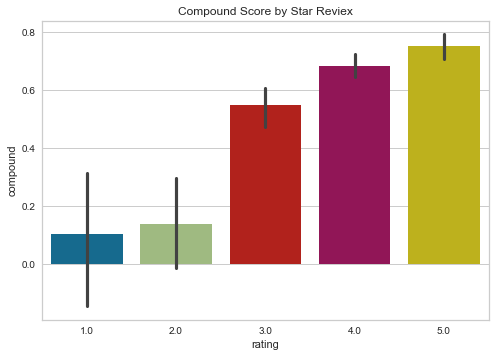

In [31]:

ax = sbn.barplot(data = vaders , x = 'rating', y = 'compound')
ax.set_title('Compound Score by Star Reviex')
plt.show()

Les notes sont proportielles à la variable coumpound puisque moins le sentiment est poisitif moins la note sera haute 

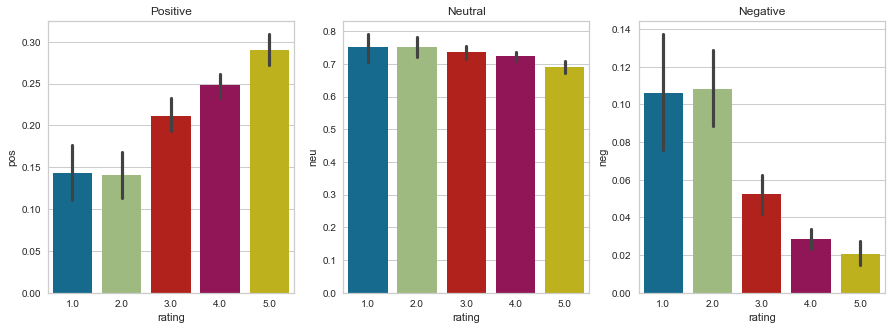

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sbn.barplot(data=vaders , x ='rating', y='pos' , ax =axs[0])
sbn.barplot(data =vaders ,x ='rating', y ='neu',ax = axs[1] )
sbn.barplot(data =vaders , x='rating', y ='neg', ax= axs[2] )
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


## Modele de Roberta

In [1]:
!pip install transformers
!pip install torch torchvision torchaudio


In [2]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.11.0
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
#from scipy.special import softmax

In [2]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]